In [3]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

In [5]:
# Load breast cancer dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
column_names = ['id_number', 'diagnosis', 'mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness', 'mean_compactness', 'mean_concavity', 'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area', 'worst_smoothness', 'worst_compactness', 'worst_concavity', 'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension']
df = pd.read_csv(url, names=column_names)
df.drop('id_number', axis=1, inplace=True)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [6]:
# Split data into training and testing sets
X = df.iloc[:, 1:]
y = df.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Train Random Forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
# Make predictions and evaluate model
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9649122807017544


In [14]:
# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])


In [15]:
# Print precision and recall
print('Precision:', precision)
print('Recall:', recall)

Precision: [0.37719298 0.49425287 0.56578947 0.61428571 0.63235294 0.671875
 0.68253968 0.70491803 0.72881356 0.78181818 0.7962963  0.82692308
 0.82352941 0.84       0.875      0.89361702 0.93333333 0.93181818
 0.95238095 0.97560976 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.        ]
Recall: [1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 0.97674419 0.97674419 0.97674419 0.97674419 0.97674419 0.95348837
 0.93023256 0.93023256 0.93023256 0.90697674 0.88372093 0.8372093
 0.81395349 0.79069767 0.76744186 0.74418605 0.65116279 0.51162791
 0.        ]


In [13]:
# Print classification report
report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [14]:
# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])

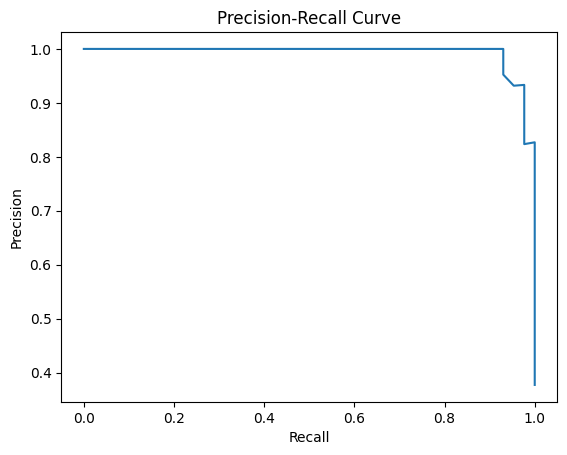

In [15]:
# Plot precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

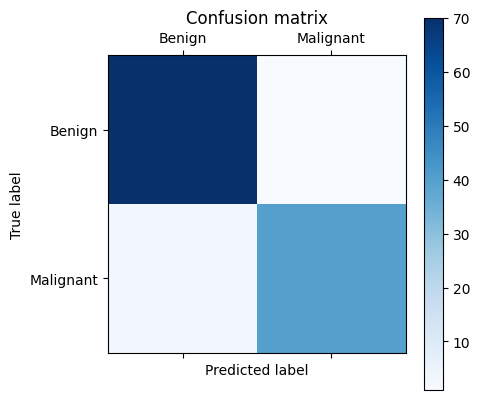

In [16]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.yticks([0, 1], ['Benign', 'Malignant'])
plt.show()

In [19]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

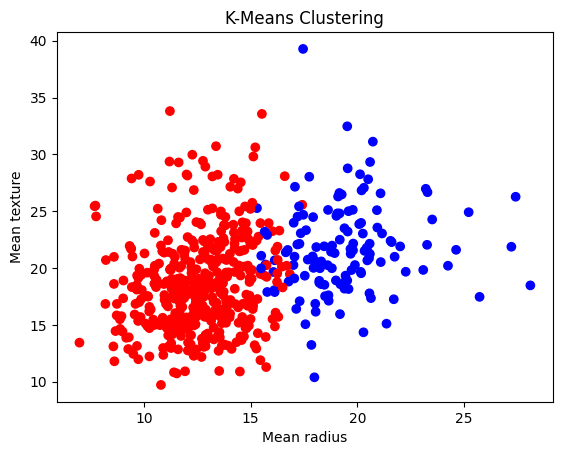

In [20]:
# Plot clustering results
colors = np.array(['red', 'blue'])
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=colors[kmeans.labels_])
plt.xlabel('Mean radius')
plt.ylabel('Mean texture')
plt.title('K-Means Clustering')
plt.show()